In [1]:
#import sys
#!{sys.executable} -m pip install --user -q sklearn
#!{sys.executable} -m pip install --user -q graphviz
#!conda install --yes --prefix {sys.prefix} graphviz

In [158]:
# import sys

!{sys.executable} -m pip install --user -q requests
!{sys.executable} -m pip install --user -q tabulate
!{sys.executable} -m pip install --user -q "colorama>=0.3.8"
!{sys.executable} -m pip install --user -q future

!{sys.executable} -m pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o --user

/usr/bin/sh: {sys.executable}: command not found
/usr/bin/sh: {sys.executable}: command not found
/usr/bin/sh: {sys.executable}: command not found
/usr/bin/sh: {sys.executable}: command not found
/usr/bin/sh: {sys.executable}: command not found


In [159]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

#palette = sns.color_palette("Set2")

palette = sns.color_palette("Set2")

params = {'legend.fontsize': 'large',
          'font.family': 'serif',
          'figure.figsize': (13,9),
          'axes.labelsize': 14,
          'axes.titlesize': 18,
          'xtick.labelsize': 14*0.75,
          'ytick.labelsize': 14*0.75}
plt.rcParams.update(params)

from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import IsolationForest, AdaBoostClassifier
#from sklearn.neighbors import LocalOutlierFactor
#from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN

import h2o

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [160]:
# This data frame contains events classified as single scatters by LZAP
# also had Chami's FV cut applied to it (very close to the WS FV cut)
df_SS_FV = pd.read_pickle("/global/homes/m/maris91/MDC3_AnomEventFinder/data/bckgData_SS_FV.pkl")
df_SS_FV.head(10)

S1c    logS2c          rc2  driftTime  eventID  runID  \
0  484.050446  5.585304   653.898842     447.94  3856795    172   
1  229.025620  5.268730  4048.036364     369.00  3857957    172   
2  441.421692  5.389695   542.451815     368.08  3859004    172   
3   23.904121  4.325637  1855.985102     171.41  3859572    172   
4  200.653870  4.820217   602.539850      88.06  3862253    172   
5   94.499443  4.810229  1153.199972     357.79  3863292    172   
6  147.147583  4.962437  3923.908896     438.06  3863894    172   
7  329.921783  5.176204  2687.531253     580.76  3863906    172   
8  376.142181  5.130528   706.526897     109.96  3864368    172   
9  388.722839  5.498510   693.131997     465.48  3864371    172   

                                                file  TBAsymmetry  \
0  /global/projecta/projectdirs/lz/data/warehouse...    -0.503264   
1  /global/projecta/projectdirs/lz/data/warehouse...    -0.340579   
2  /global/projecta/projectdirs/lz/data/warehouse...    -0.436119   
3  /global/projecta/projectdirs/lz/data/warehouse...    -0.172046   
4  /global/projecta/projectdirs/lz/data/warehouse...    -0.030354   
5  /global/projecta/projectdirs/lz/data/warehouse...    -0.384690   
6  /global/projecta/projectdirs/lz/data/warehouse...    -0.416537   
7  /global/projecta/projectdirs/lz/data/warehouse...    -0.591879   
8  /global/projecta/projectdirs/lz/data/warehouse...    -0.002934   
9  /global/projecta/projectdirs/lz/data/warehouse...    -0.505067   

   peakFractionTop  peakFractionBottom  ...  s1AFT99  s2AFT1  s2AFT5  s2AFT10  \
0         0.034230            0.015756  ...      310     780    1280     1550   
1         0.041043            0.026177  ...      410    1070    1700     2000   
2         0.023673            0.026668  ...      440     830    1300     1560   
3         0.210982            0.160266  ...      280     380     710      900   
4         0.043441            0.044332  ...      280     360     630      780   
5         0.079261            0.045525  ...      240     580     950     1190   
6         0.055012            0.032393  ...      280     940    1400     1670   
7         0.052111            0.022197  ...      410     810    1400     1730   
8         0.032998            0.031594  ...      300     380     680      840   
9         0.041993            0.023553  ...      390    1210    1740     2010   

   s2AFT25  s2AFT50  s2AFT75  s2AFT90  s2AFT95  s2AFT99  
0     2030     2570     3090     3590     3960     4850  
1     2450     2950     3450     3920     4260     5230  
2     1990     2490     2980     3460     3780     4440  
3     1220     1580     1930     2260     2510     3110  
4     1030     1340     1650     1970     2200     2980  
5     1610     2070     2520     2970     3310     4540  
6     2140     2670     3210     3770     4130     5130  
7     2290     2870     3460     4000     4340     5200  
8     1100     1420     1760     2110     2380     3300  
9     2490     3030     3580     4100     4420     5240  

[10 rows x 34 columns]

In [161]:
list(df_SS_FV.columns)

['S1c',
 'logS2c',
 'rc2',
 'driftTime',
 'eventID',
 'runID',
 'file',
 'TBAsymmetry',
 'peakFractionTop',
 'peakFractionBottom',
 'clusterSize',
 'promptFraction',
 'pulseBeforeS1Size',
 'pulseAfterS1Size',
 'pulseBeforeS2Size',
 'pulseAfterS2Size',
 's1AFT1',
 's1AFT5',
 's1AFT10',
 's1AFT25',
 's1AFT50',
 's1AFT75',
 's1AFT90',
 's1AFT95',
 's1AFT99',
 's2AFT1',
 's2AFT5',
 's2AFT10',
 's2AFT25',
 's2AFT50',
 's2AFT75',
 's2AFT90',
 's2AFT95',
 's2AFT99']

In [162]:
# choose set of training variables
# note S1 and S2 size as well as X,Y,Z(driftTime),and TBA are not used in the training set
trainingVariablesDict = {0 : "peakFractionTop",
                         1 : "peakFractionBottom",
                         2 : "clusterSize",
                         3 : "promptFraction",
                         4 : "pulseBeforeS1Size",
                         5 : "pulseBeforeS2Size",
                         6 : "pulseAfterS1Size",
                         7 : "pulseAfterS2Size",
                         8 : "s1AFT1",
                         9 : "s1AFT5",
                         10 : "s1AFT10",
                         11 : "s1AFT25",
                         12 : "s1AFT50",
                         13 : "s1AFT75",
                         14 : "s1AFT90",
                         15 : "s1AFT95",
                         16 : "s1AFT99",
                         17 : "s2AFT1",
                         18 : "s2AFT5",
                         19 : "s2AFT10",
                         20 : "s2AFT25",
                         21 : "s2AFT50",
                         22 : "s2AFT75",
                         23 : "s2AFT90",
                         24 : "s2AFT95",
                         25 : "s2AFT99"}
                         #26 : "S1c",
                         #27 : "logS2c"
                         #28 : "rc2",
                         #29 : "driftTime"}

trainingVariables = list(trainingVariablesDict.values())

In [163]:
trainingVariables

['peakFractionTop',
 'peakFractionBottom',
 'clusterSize',
 'promptFraction',
 'pulseBeforeS1Size',
 'pulseBeforeS2Size',
 'pulseAfterS1Size',
 'pulseAfterS2Size',
 's1AFT1',
 's1AFT5',
 's1AFT10',
 's1AFT25',
 's1AFT50',
 's1AFT75',
 's1AFT90',
 's1AFT95',
 's1AFT99',
 's2AFT1',
 's2AFT5',
 's2AFT10',
 's2AFT25',
 's2AFT50',
 's2AFT75',
 's2AFT90',
 's2AFT95',
 's2AFT99']

In [164]:
# create a copy df for tSNE with only the training vars
df_TV = pd.DataFrame(df_SS_FV,columns=trainingVariables)

In [165]:
df_TV.head(10)

peakFractionTop  peakFractionBottom  clusterSize  promptFraction  \
0         0.034230            0.015756    41.873293        0.355432   
1         0.041043            0.026177    43.114155        0.381714   
2         0.023673            0.026668    43.873421        0.366039   
3         0.210982            0.160266    33.079799        0.277482   
4         0.043441            0.044332    43.450362        0.402527   
5         0.079261            0.045525    46.786014        0.460390   
6         0.055012            0.032393    42.829362        0.422369   
7         0.052111            0.022197    43.685790        0.388956   
8         0.032998            0.031594    40.249638        0.370858   
9         0.041993            0.023553    43.459062        0.353470   

   pulseBeforeS1Size  pulseBeforeS2Size  pulseAfterS1Size  pulseAfterS2Size  \
0          -0.150033           0.408407          0.646792       3601.656250   
1           0.594618           1.138777          0.019211       2446.773438   
2           0.932192           0.824333         -0.000738       2067.156250   
3          -0.052927           0.616037          0.247095        113.794731   
4           0.570513           0.809341          1.214136        204.148438   
5           0.677870           0.862209          1.003821        102.078125   
6           1.039872           0.900588          1.082233        413.733551   
7           0.643815           0.503435          0.065644        961.701782   
8           0.642145           1.011482          3.985504        475.609375   
9           1.151343           0.551762          0.392973       3343.562500   

   s1AFT1  s1AFT5  ...  s1AFT99  s2AFT1  s2AFT5  s2AFT10  s2AFT25  s2AFT50  \
0      40      50  ...      310     780    1280     1550     2030     2570   
1      40      50  ...      410    1070    1700     2000     2450     2950   
2      40      60  ...      440     830    1300     1560     1990     2490   
3      20      40  ...      280     380     710      900     1220     1580   
4      30      50  ...      280     360     630      780     1030     1340   
5      30      40  ...      240     580     950     1190     1610     2070   
6      40      50  ...      280     940    1400     1670     2140     2670   
7      40      50  ...      410     810    1400     1730     2290     2870   
8      30      40  ...      300     380     680      840     1100     1420   
9      40      50  ...      390    1210    1740     2010     2490     3030   

   s2AFT75  s2AFT90  s2AFT95  s2AFT99  
0     3090     3590     3960     4850  
1     3450     3920     4260     5230  
2     2980     3460     3780     4440  
3     1930     2260     2510     3110  
4     1650     1970     2200     2980  
5     2520     2970     3310     4540  
6     3210     3770     4130     5130  
7     3460     4000     4340     5200  
8     1760     2110     2380     3300  
9     3580     4100     4420     5240  

[10 rows x 26 columns]

In [166]:
perp = 100
niter = 2000

In [167]:
# get tSNE from sklearn 
# normalize the data before dim. red. with sklearn's precorcessing
from sklearn import preprocessing
from sklearn.manifold import TSNE
df_Scaled = preprocessing.scale(df_SS_FV[trainingVariables])
tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=niter)
tsne_results = tsne.fit_transform(df_Scaled)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 14598 samples in 0.014s...
[t-SNE] Computed neighbors for 14598 samples in 11.100s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14598
[t-SNE] Computed conditional probabilities for sample 2000 / 14598
[t-SNE] Computed conditional probabilities for sample 3000 / 14598
[t-SNE] Computed conditional probabilities for sample 4000 / 14598
[t-SNE] Computed conditional probabilities for sample 5000 / 14598
[t-SNE] Computed conditional probabilities for sample 6000 / 14598
[t-SNE] Computed conditional probabilities for sample 7000 / 14598
[t-SNE] Computed conditional probabilities for sample 8000 / 14598
[t-SNE] Computed conditional probabilities for sample 9000 / 14598
[t-SNE] Computed conditional probabilities for sample 10000 / 14598
[t-SNE] Computed conditional probabilities for sample 11000 / 14598
[t-SNE] Computed conditional probabilities for sample 12000 / 14598
[t-SNE] Computed conditional probabilities for s

Text(0, 0.5, 'tSNE-two')

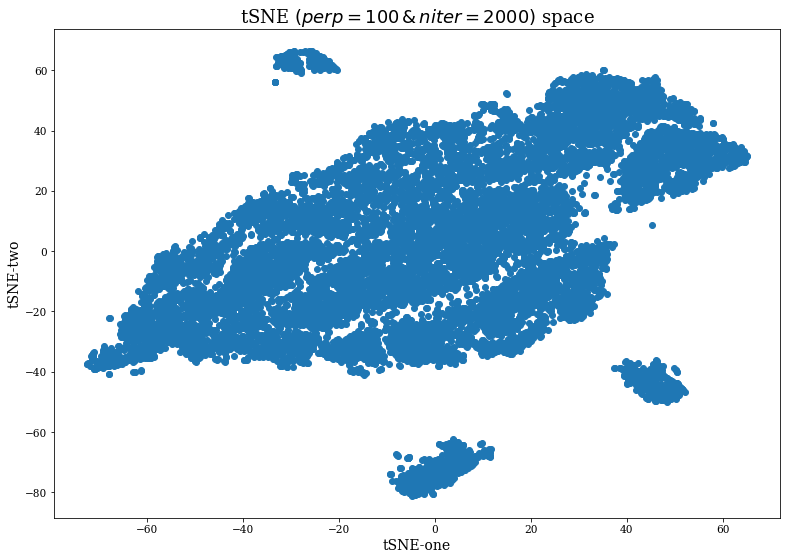

In [168]:
plt.scatter(tsne_results[:,0], tsne_results[:,1])
plt.title("tSNE $(perp=%i \,&\, niter=%i)$ space" %(perp,niter))
plt.xlabel('tSNE-one')
plt.ylabel('tSNE-two')

In [169]:
# add the tSNE variables to the df
df_SS_FV['tSNEone'] = tsne_results[:,0]
df_SS_FV['tSNEtwo'] = tsne_results[:,1] 

In [170]:
tSNEScatterPlot = sns.relplot(x = 'tSNEone',
                              y = 'tSNEtwo',
                              data = df_SS_FV,
                              height = 7, aspect = 1.5, 
                              color = palette[0])
plt.title("tSNE $(perp=%i \,&\, niter=%i)$ space" %(perp,niter)) 
plt.xlabel('tSNE-one') 
plt.ylabel('tSNE-two')
plt.grid(True, axis='both', which='both', color=palette[7])
# plt.xlim(0, 500)
# plt.ylim(3.25, 6)
plt.show()

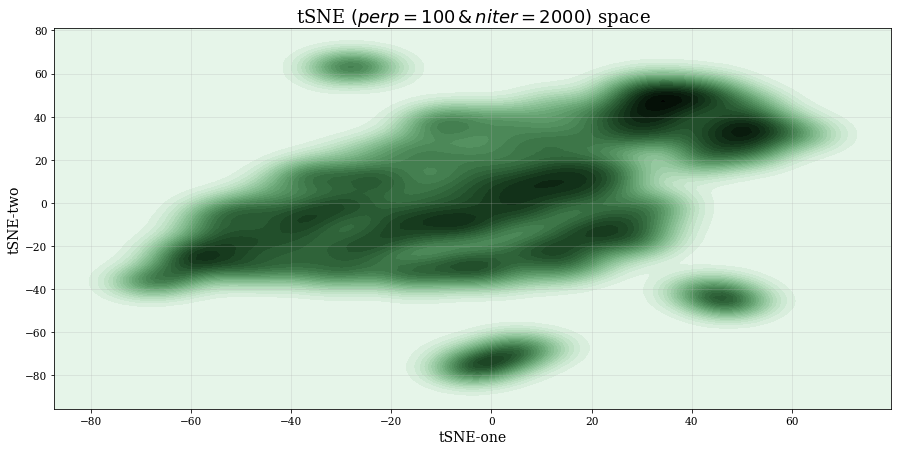

In [171]:
f, ax = plt.subplots(figsize=(15, 7))
plt.grid(True, alpha = 0.3)
cmap = sns.cubehelix_palette(as_cmap=True, start=2, rot=0, dark=0, light=0.95, reverse=False)
sns.kdeplot(df_SS_FV['tSNEone'], df_SS_FV['tSNEtwo'], ax=ax, cmap = cmap, n_levels = 30, shade = True)
plt.xlabel('tSNE-one')
plt.ylabel('tSNE-two')
plt.title("tSNE $(perp=%i \,&\, niter=%i)$ space" %(perp,niter))
plt.show()

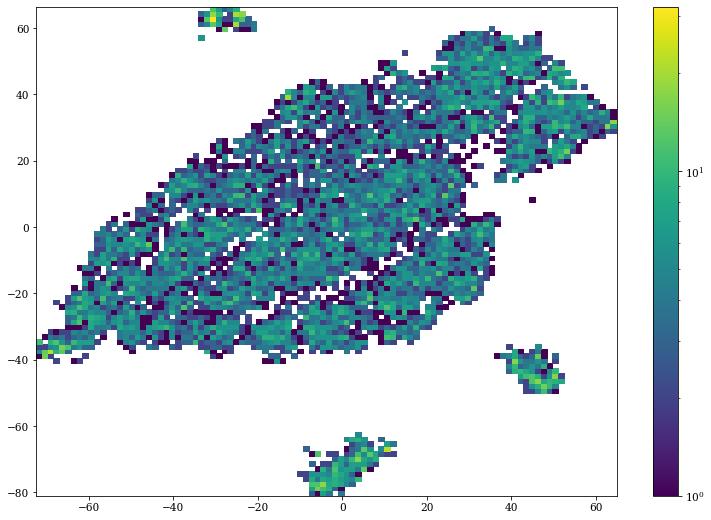

In [172]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt


h = plt.hist2d(df_SS_FV['tSNEone'], df_SS_FV['tSNEtwo'], bins=100, norm=LogNorm())
plt.colorbar(h[3])
plt.show()

In [173]:
 # List of tSNE variables that will be inputs to the clustering algorithm
tSNEVariablesDict = {0 : "tSNEone",
                     1 : "tSNEtwo"}

tSNEVariables = list(tSNEVariablesDict.values())

In [174]:
 # tSNE df for clustering input
tSNE_df = pd.DataFrame(df_SS_FV,columns=tSNEVariables)

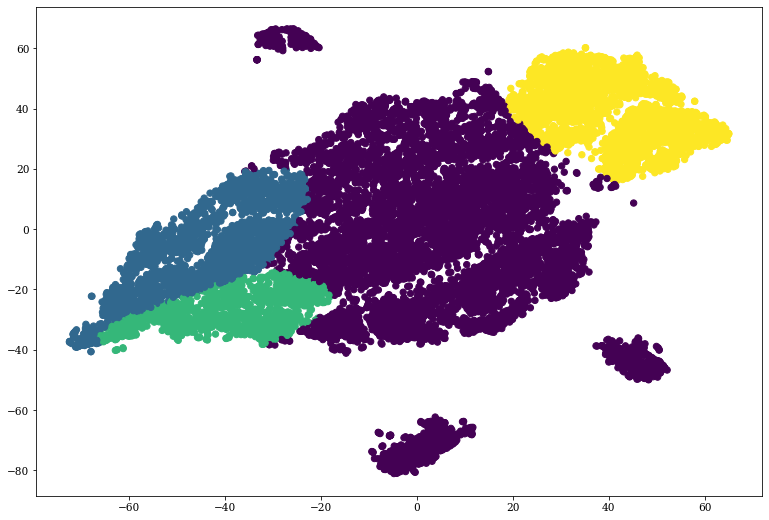

In [175]:
# using gaussian mixture for clustering the data in tSNE space
from sklearn.mixture import GaussianMixture

params = {'legend.fontsize': 'large',
          'font.family': 'serif',
          'figure.figsize': (13,9),
          'axes.labelsize': 14,
          'axes.titlesize': 18,
          'xtick.labelsize': 14*0.75,
          'ytick.labelsize': 14*0.75}
plt.rcParams.update(params)

m1 = [0,2.5]
m2 = [-7,-5]
m3 = [0,-7]
m4 = [8,-1]

gmm = GaussianMixture(n_components=4,
                      tol=0.0001,
                      reg_covar=1e-08,
                      max_iter=10000,
                      #n_init=1,
                      covariance_type='full',
                      weights_init=[0.9,0.06,0.03,0.01],
                      means_init=[m1,m2,m3,m4],).fit(tSNE_df)
labels = gmm.predict(tSNE_df)
plt.scatter(tSNE_df['tSNEone'], tSNE_df['tSNEtwo'], c=labels, s=40, cmap='viridis');

In [176]:
# using DBSCAN for clustering the data in tSNE space
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=4, min_samples=50).fit(tSNE_df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [177]:
print(set(db.labels_))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(tSNE_df, labels))

{0, 1, 2, 3, -1}
Estimated number of clusters: 4
Estimated number of noise points: 18
Silhouette Coefficient: 0.156


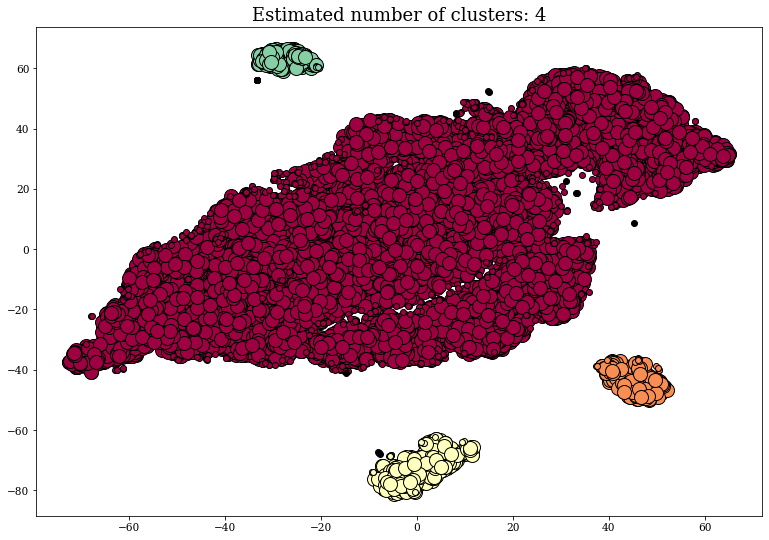

In [178]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = tSNE_df[class_member_mask & core_samples_mask]
    plt.plot(xy['tSNEone'], xy['tSNEtwo'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = tSNE_df[class_member_mask & ~core_samples_mask]
    plt.plot(xy['tSNEone'], xy['tSNEtwo'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Text(0, 0.5, 'tSNE-two')

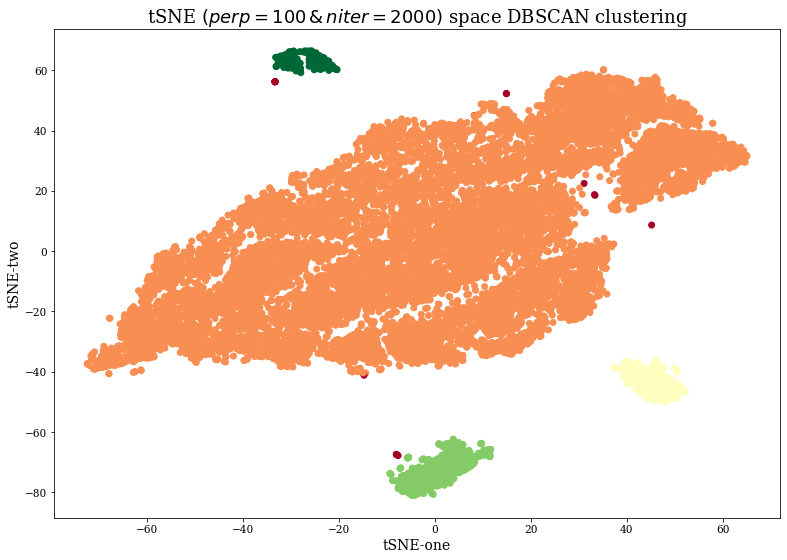

In [179]:
plt.scatter(tSNE_df['tSNEone'], tSNE_df['tSNEtwo'],c=db.labels_, cmap='RdYlGn')
plt.title("tSNE $(perp=%i \,&\, niter=%i)$ space DBSCAN clustering" %(perp,niter))
plt.xlabel('tSNE-one')
plt.ylabel('tSNE-two')

In [180]:
# adding a tSNE label column found by the DBSCAN algorithm
df_SS_FV['tSNE_labels'] = labels

In [181]:
df_SS_FV.head()

S1c    logS2c          rc2  driftTime  eventID  runID  \
0  484.050446  5.585304   653.898842     447.94  3856795    172   
1  229.025620  5.268730  4048.036364     369.00  3857957    172   
2  441.421692  5.389695   542.451815     368.08  3859004    172   
3   23.904121  4.325637  1855.985102     171.41  3859572    172   
4  200.653870  4.820217   602.539850      88.06  3862253    172   

                                                file  TBAsymmetry  \
0  /global/projecta/projectdirs/lz/data/warehouse...    -0.503264   
1  /global/projecta/projectdirs/lz/data/warehouse...    -0.340579   
2  /global/projecta/projectdirs/lz/data/warehouse...    -0.436119   
3  /global/projecta/projectdirs/lz/data/warehouse...    -0.172046   
4  /global/projecta/projectdirs/lz/data/warehouse...    -0.030354   

   peakFractionTop  peakFractionBottom  ...  s2AFT10  s2AFT25  s2AFT50  \
0         0.034230            0.015756  ...     1550     2030     2570   
1         0.041043            0.026177  ...     2000     2450     2950   
2         0.023673            0.026668  ...     1560     1990     2490   
3         0.210982            0.160266  ...      900     1220     1580   
4         0.043441            0.044332  ...      780     1030     1340   

   s2AFT75  s2AFT90  s2AFT95  s2AFT99    tSNEone    tSNEtwo  tSNE_labels  
0     3090     3590     3960     4850  -0.877632  -0.870143            0  
1     3450     3920     4260     5230  -7.270141 -31.076870            0  
2     2980     3460     3780     4440  16.601519 -19.042011            0  
3     1930     2260     2510     3110  12.072671  46.959782            0  
4     1650     1970     2200     2980  29.562849  51.922993            0  

[5 rows x 37 columns]

In [182]:
cdict = {-1: 'black', 0: 'yellow', 1: 'cyan', 2: 'purple', 3: 'red', 4: 'darkorange', 5: 'green', 6: 'blue', 7: 'magenta', 8: 'grey'}
colors = [cdict[color] for color in df_SS_FV['tSNE_labels']]

Text(0, 0.5, 'log$_{10}$(S2 [phd])')

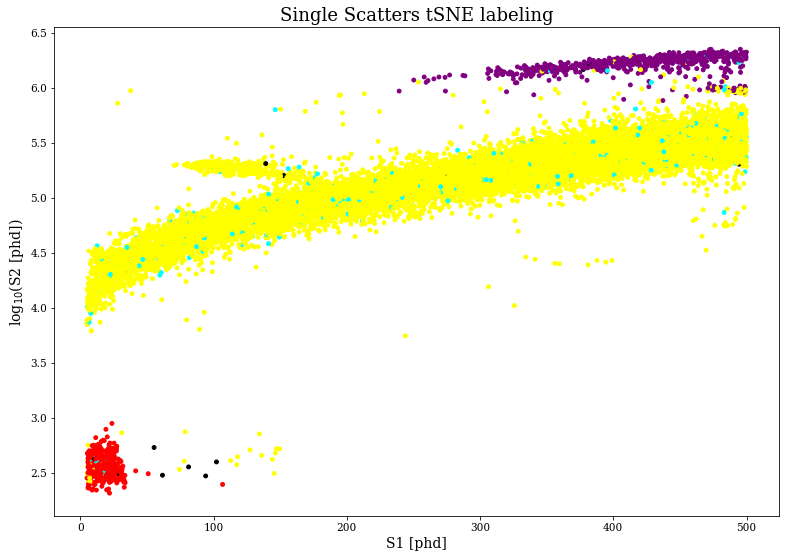

In [183]:
plt.scatter(df_SS_FV['S1c'], df_SS_FV['logS2c'], c = colors, s = 15)
plt.title("Single Scatters tSNE labeling") 
plt.xlabel('S1 [phd]') 
plt.ylabel(r'log$_{10}$(S2 [phd])')

Text(0, 0.5, 'driftTime [$\\mu$s]')

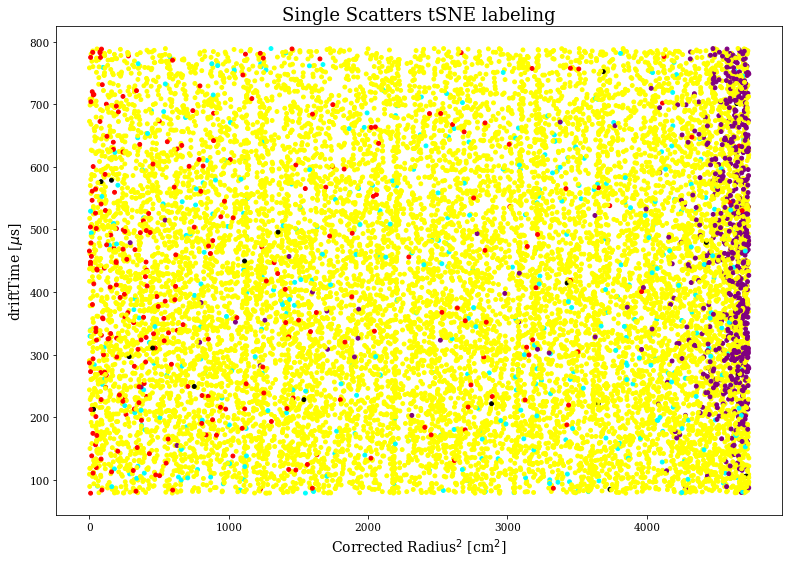

In [184]:
plt.scatter(df_SS_FV['rc2'], df_SS_FV['driftTime'], c = colors, s = 15)
plt.title("Single Scatters tSNE labeling") 
plt.xlabel('Corrected Radius$^2$ [cm$^2$]') 
plt.ylabel(r'driftTime [$\mu$s]')

In [185]:
# double checking the unique labels from the DBSCAN clustering
print(df_SS_FV.tSNE_labels.unique())

[ 0  1  2  3 -1]


Text(0, 0.5, 'tSNE-two')

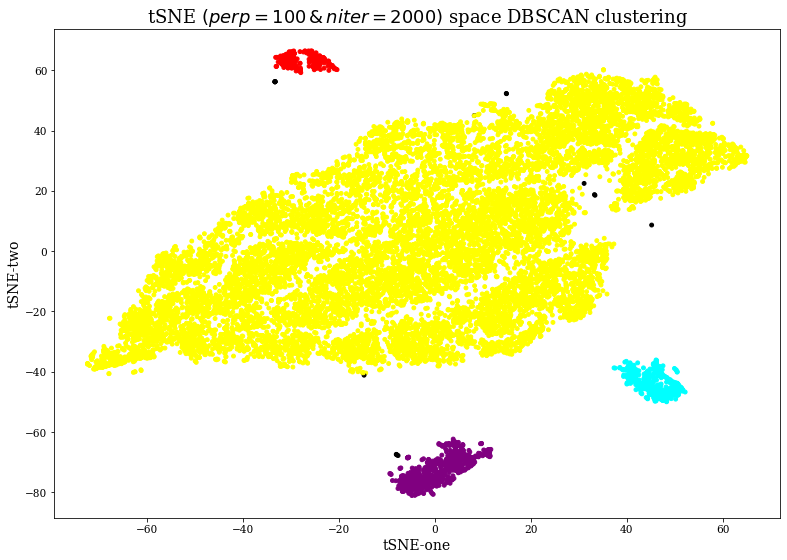

In [186]:
plt.scatter(df_SS_FV['tSNEone'], df_SS_FV['tSNEtwo'],c=colors, s= 15)
plt.title("tSNE $(perp=%i \,&\, niter=%i)$ space DBSCAN clustering" %(perp,niter))
plt.xlabel('tSNE-one')
plt.ylabel('tSNE-two')

In [187]:
# saving the tSNE and DBSCAN information to a pickle file
df_SS_FV.to_pickle("/global/homes/m/maris91/MDC3_AnomEventFinder/data/tSNE_2Dred_SS_WS_latest.pkl") 

In [348]:
# saving the tSNE model only
import pickle
model_filename = '/global/homes/m/maris91/MDC3_AnomEventFinder/data/tSNE_model_prep100_niter1k.pkl'
pickle.dump(tsne_results, open(model_filename, 'wb'))

In [7]:
# This data frame contains events classified as single scatters by LZAP
# also had Chami's FV cut applied to it (very close to the WS FV cut)
df_SS_FV = pd.read_pickle("/global/homes/m/maris91/MDC3_AnomEventFinder/data/tSNE_2Dred_SS_WS.pkl")
df_SS_FV.head(10)

S1c    logS2c          rc2  driftTime  eventID  runID  \
0  484.050446  5.585304   653.898842     447.94  3856795    172   
1  229.025620  5.268730  4048.036364     369.00  3857957    172   
2  441.421692  5.389695   542.451815     368.08  3859004    172   
3   23.904121  4.325637  1855.985102     171.41  3859572    172   
4  200.653870  4.820217   602.539850      88.06  3862253    172   
5   94.499443  4.810229  1153.199972     357.79  3863292    172   
6  147.147583  4.962437  3923.908896     438.06  3863894    172   
7  329.921783  5.176204  2687.531253     580.76  3863906    172   
8  376.142181  5.130528   706.526897     109.96  3864368    172   
9  388.722839  5.498510   693.131997     465.48  3864371    172   

                                                file  TBAsymmetry  \
0  /global/projecta/projectdirs/lz/data/warehouse...    -0.503264   
1  /global/projecta/projectdirs/lz/data/warehouse...    -0.340579   
2  /global/projecta/projectdirs/lz/data/warehouse...    -0.436119   
3  /global/projecta/projectdirs/lz/data/warehouse...    -0.172046   
4  /global/projecta/projectdirs/lz/data/warehouse...    -0.030354   
5  /global/projecta/projectdirs/lz/data/warehouse...    -0.384690   
6  /global/projecta/projectdirs/lz/data/warehouse...    -0.416537   
7  /global/projecta/projectdirs/lz/data/warehouse...    -0.591879   
8  /global/projecta/projectdirs/lz/data/warehouse...    -0.002934   
9  /global/projecta/projectdirs/lz/data/warehouse...    -0.505067   

   peakFractionTop  peakFractionBottom  ...  s2AFT5  s2AFT25  s2AFT50  \
0         0.034230            0.015756  ...    1280     2030      110   
1         0.041043            0.026177  ...    1700     2450      110   
2         0.023673            0.026668  ...    1300     1990      120   
3         0.210982            0.160266  ...     710     1220      100   
4         0.043441            0.044332  ...     630     1030      100   
5         0.079261            0.045525  ...     950     1610       90   
6         0.055012            0.032393  ...    1400     2140      100   
7         0.052111            0.022197  ...    1400     2290      110   
8         0.032998            0.031594  ...     680     1100      100   
9         0.041993            0.023553  ...    1740     2490      110   

   s2AFT75  s2AFT90  s2AFT95  s2AFT99    tSNEone    tSNEtwo  tSNE_labels  
0      150      200      240      310  -9.259842   7.665052            0  
1      150      200      260      410 -34.697834 -20.095709            1  
2      160      220      260      440 -17.652163 -19.151978            1  
3      130      180      210      280  34.639820  22.813757            0  
4      140      180      220      280  28.468910  -7.172385            0  
5      120      170      200      240  22.591415  13.586599            0  
6      140      190      230      280   4.666019  24.844769            0  
7      140      200      250      410 -22.914299 -13.605124            1  
8      140      190      230      300  39.415638  -1.579230            0  
9      150      210      250      390 -34.763615 -22.173271            1  

[10 rows x 35 columns]

(2, 6.5)

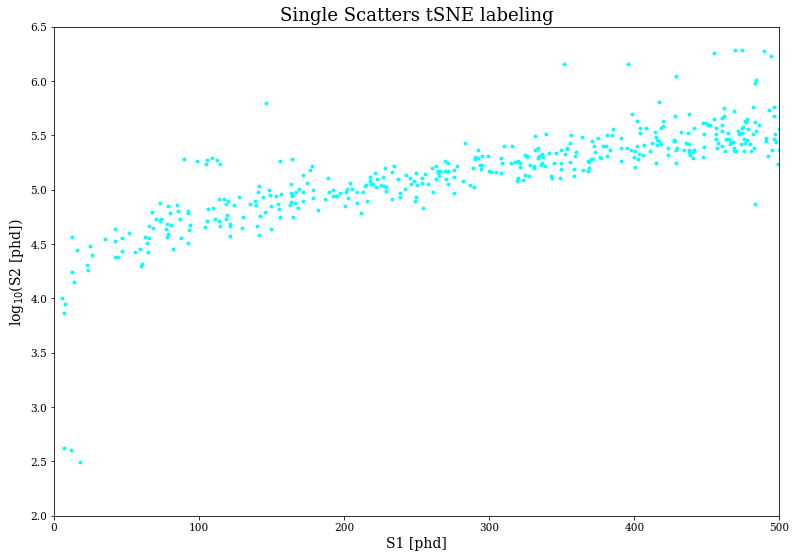

In [188]:
#selecting a population colorcoded in using cdict dictionary variable to plot
pop = 1
popCol = cdict[pop]

plt.scatter(df_SS_FV[df_SS_FV['tSNE_labels'] == pop].S1c, df_SS_FV[df_SS_FV['tSNE_labels'] == pop].logS2c, s = 8, c=cdict[pop])
plt.title("Single Scatters tSNE labeling") 
plt.xlabel('S1 [phd]') 
plt.ylabel(r'log$_{10}$(S2 [phd])')
plt.xlim(0, 500)
plt.ylim(2, 6.5)

In [189]:
plt.scatter(df_SS_FV[df_SS_FV['tSNE_labels'] == pop].rc2, df_SS_FV[df_SS_FV['tSNE_labels'] == pop].driftTime, s = 8, c=cdict[pop])
plt.title("Single Scatters tSNE labeling") 
plt.xlabel('Corrected Radius$^2$ [cm$^2$]') 
plt.ylabel(r'driftTime [$\mu$s]')
#plt.xlim(0, 500)
plt.ylim(100, 800)

(100, 800)

In [388]:
# saving a txt file of the selected population events with event viewer format
header = ['file', 'runID', 'eventID']
df_SS_FV[df_SS_FV['tSNE_labels'] == pop].to_csv('/global/homes/m/maris91/MDC3_AnomEventFinder/data/anomEvents_tSNE_p%i _n%i _%s.txt' %(perp, niter, popCol), columns = header, index=False)

In [190]:
# loading the 1 month MDC3 data now with all other WS cuts applied (in addtion to FV and SS)
# note that this has the ALPACA MDC3() FV Cut which is only slightly different than the FV applied in df_SS_FV
df_MDC3_WS = pd.read_pickle("/global/homes/m/maris91/MDC3_AnomEventFinder/data/bckgData_SS_FV_WS_AllCuts_30.pkl")
#df_MDC3_WS = pd.read_pickle("/global/homes/m/maris91/MDC3_AnomEventFinder/data/bckgData_SS_WS_all.pkl")
df_MDC3_WS.head(10)

S1c    logS2c          rc2  driftTime  eventID  runID  \
0  382.128479  5.206452   208.681063     672.32   159244    245   
1  120.908127  4.783649   800.960519     137.33   211232    245   
2  211.020248  4.872536  3884.084415      87.16   292712    245   
3   92.694962  4.659508   128.724963     694.36   295371    245   
4   90.761574  4.754339  3497.557257     382.93   501701    245   
5  175.699341  4.854082  1244.124398     696.75   575140    245   
6  126.604912  4.802285  1624.983126     299.34   766502    245   
7  361.046051  5.423139  4469.648881     456.48   903732    245   
8  454.442383  5.320346  2494.486354     483.88  1506728    245   
9  129.214447  4.650409  4444.523709     241.41  1565697    245   

                                                file  TBAsymmetry  \
0  /global/projecta/projectdirs/lz/data/warehouse...    -0.741715   
1  /global/projecta/projectdirs/lz/data/warehouse...    -0.350585   
2  /global/projecta/projectdirs/lz/data/warehouse...    -0.002249   
3  /global/projecta/projectdirs/lz/data/warehouse...    -0.704840   
4  /global/projecta/projectdirs/lz/data/warehouse...    -0.409037   
5  /global/projecta/projectdirs/lz/data/warehouse...    -0.674917   
6  /global/projecta/projectdirs/lz/data/warehouse...    -0.347823   
7  /global/projecta/projectdirs/lz/data/warehouse...    -0.485783   
8  /global/projecta/projectdirs/lz/data/warehouse...    -0.549275   
9  /global/projecta/projectdirs/lz/data/warehouse...    -0.204084   

   peakFractionTop  peakFractionBottom  ...  s1AFT99  s2AFT1  s2AFT5  s2AFT10  \
0         0.048168            0.019175  ...      380     660    1120     1400   
1         0.055638            0.044927  ...      350     360     670      860   
2         0.036390            0.040069  ...      310     350     590      730   
3         0.126288            0.043685  ...      270     680    1240     1500   
4         0.078534            0.060165  ...      280     680    1140     1380   
5         0.102343            0.029043  ...      290    1500    1970     2280   
6         0.054159            0.035016  ...      290     620    1050     1290   
7         0.038750            0.019022  ...      370     940    1570     1890   
8         0.031207            0.020645  ...      420     830    1380     1670   
9         0.078631            0.036479  ...      300     620    1070     1370   

   s2AFT25  s2AFT50  s2AFT75  s2AFT90  s2AFT95  s2AFT99  
0     1890     2470     3080     3610     3990     4940  
1     1170     1520     1860     2180     2400     3070  
2      980     1290     1610     1940     2200     3120  
3     2030     2610     3240     3830     4220     5110  
4     1790     2260     2770     3260     3570     4830  
5     2850     3440     4070     4690     5080     5940  
6     1710     2190     2680     3180     3470     4030  
7     2410     2990     3560     4130     4500     5350  
8     2160     2710     3260     3770     4100     4980  
9     1820     2310     2810     3320     3680     4400  

[10 rows x 34 columns]

In [191]:
# multiplying event ID with run ID for creating a unique tag for each event in MDC3 WS set
df_MDC3_WS['tag'] = df_MDC3_WS.eventID*df_MDC3_WS.runID

In [192]:
# multiplying event ID with run ID for creating a unique tag for each event in df_SS_FV set
df_SS_FV['tag'] = df_SS_FV.eventID*df_SS_FV.runID

In [193]:
# seeing which of the MDC3 WS events are in df_SS_FV
df_SS_FV['isInWS'] = df_SS_FV['tag'].isin(df_MDC3_WS['tag'])

In [194]:
# redeclaring the df_MDC3_WS to include the tSNE and label inormation determined on df_SS_FV
df_MDC3_WS = df_SS_FV[df_SS_FV.isInWS]

In [195]:
df_MDC3_WS.head()

S1c    logS2c          rc2  driftTime  eventID  runID  \
0  484.050446  5.585304   653.898842     447.94  3856795    172   
1  229.025620  5.268730  4048.036364     369.00  3857957    172   
2  441.421692  5.389695   542.451815     368.08  3859004    172   
3   23.904121  4.325637  1855.985102     171.41  3859572    172   
4  200.653870  4.820217   602.539850      88.06  3862253    172   

                                                file  TBAsymmetry  \
0  /global/projecta/projectdirs/lz/data/warehouse...    -0.503264   
1  /global/projecta/projectdirs/lz/data/warehouse...    -0.340579   
2  /global/projecta/projectdirs/lz/data/warehouse...    -0.436119   
3  /global/projecta/projectdirs/lz/data/warehouse...    -0.172046   
4  /global/projecta/projectdirs/lz/data/warehouse...    -0.030354   

   peakFractionTop  peakFractionBottom  ...  s2AFT50  s2AFT75  s2AFT90  \
0         0.034230            0.015756  ...     2570     3090     3590   
1         0.041043            0.026177  ...     2950     3450     3920   
2         0.023673            0.026668  ...     2490     2980     3460   
3         0.210982            0.160266  ...     1580     1930     2260   
4         0.043441            0.044332  ...     1340     1650     1970   

   s2AFT95  s2AFT99    tSNEone    tSNEtwo  tSNE_labels        tag  isInWS  
0     3960     4850  -0.877632  -0.870143            0  663368740    True  
1     4260     5230  -7.270141 -31.076870            0  663568604    True  
2     3780     4440  16.601519 -19.042011            0  663748688    True  
3     2510     3110  12.072671  46.959782            0  663846384    True  
4     2200     2980  29.562849  51.922993            0  664307516    True  

[5 rows x 39 columns]

(2.5, 6.5)

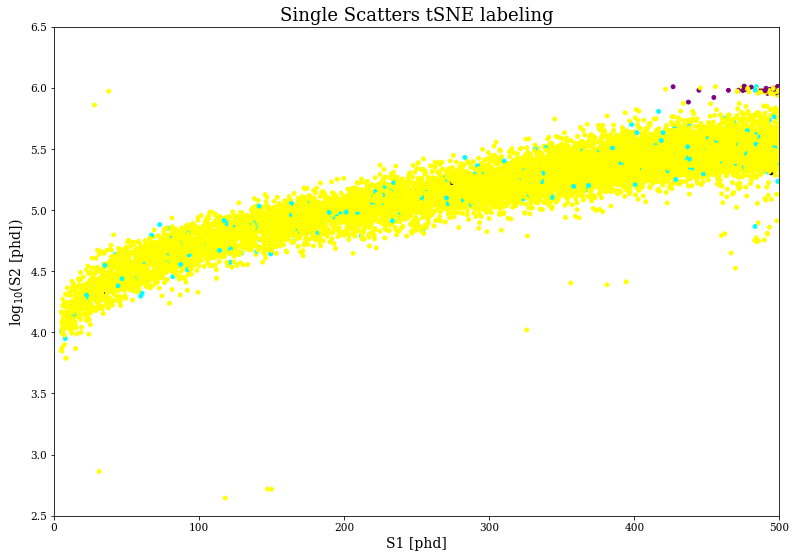

In [196]:
WS_colors = [cdict[color] for color in df_MDC3_WS['tSNE_labels']]
plt.scatter(df_MDC3_WS['S1c'], df_MDC3_WS['logS2c'], c = WS_colors, s = 15)
plt.title("Single Scatters tSNE labeling") 
plt.xlabel('S1 [phd]') 
plt.ylabel(r'log$_{10}$(S2 [phd])')
plt.xlim(0, 500)
plt.ylim(2.5, 6.5)

In [198]:
# Chami and I worked on the same data so his ISF anomaly scores can be maped into the tSNE space
df_ISF_chami = pd.read_pickle("/global/cfs/cdirs/lz/users/chami/AnomalousEventFinder/Misc/pickleForMaris.pkl")
df_ISF_chami.head(10)

S1c    logS2c          rc2  driftTime  eventID  runID  \
0  484.050446  5.585304   653.898842     447.94  3856795    172   
1  229.025620  5.268730  4048.036364     369.00  3857957    172   
2  441.421692  5.389695   542.451815     368.08  3859004    172   
3   23.904121  4.325637  1855.985102     171.41  3859572    172   
4  200.653870  4.820217   602.539850      88.06  3862253    172   
5   94.499443  4.810229  1153.199972     357.79  3863292    172   
6  147.147583  4.962437  3923.908896     438.06  3863894    172   
7  329.921783  5.176204  2687.531253     580.76  3863906    172   
8  376.142181  5.130528   706.526897     109.96  3864368    172   
9  388.722839  5.498510   693.131997     465.48  3864371    172   

                                                file  TBAsymmetry  \
0  /global/projecta/projectdirs/lz/data/warehouse...    -0.503264   
1  /global/projecta/projectdirs/lz/data/warehouse...    -0.340579   
2  /global/projecta/projectdirs/lz/data/warehouse...    -0.436119   
3  /global/projecta/projectdirs/lz/data/warehouse...    -0.172046   
4  /global/projecta/projectdirs/lz/data/warehouse...    -0.030354   
5  /global/projecta/projectdirs/lz/data/warehouse...    -0.384690   
6  /global/projecta/projectdirs/lz/data/warehouse...    -0.416537   
7  /global/projecta/projectdirs/lz/data/warehouse...    -0.591879   
8  /global/projecta/projectdirs/lz/data/warehouse...    -0.002934   
9  /global/projecta/projectdirs/lz/data/warehouse...    -0.505067   

   peakFractionTop  peakFractionBottom  ...  s1PulseArea5000  s2PulseArea50  \
0         0.034230            0.015756  ...       474.292786    1590.523438   
1         0.041043            0.026177  ...       211.560425     600.443359   
2         0.023673            0.026668  ...       384.706299    1104.937012   
3         0.210982            0.160266  ...        20.911556     167.935120   
4         0.043441            0.044332  ...       161.852661     803.349121   
5         0.079261            0.045525  ...        84.797844     328.092285   
6         0.055012            0.032393  ...       133.824905     340.251190   
7         0.052111            0.022197  ...       335.409943     399.488770   
8         0.032998            0.031594  ...       314.840668    1476.369141   
9         0.041993            0.023553  ...       390.634918    1225.648438   

   s2PulseArea100  s2PulseArea200  s2PulseArea500  s2PulseArea1000  \
0     3346.339844     7342.757812    23872.441406     65960.945312   
1     1256.260742     2840.355469    10361.291016     31338.021484   
2     2400.697754     5409.279785    18554.884766     52741.855469   
3      364.373474      860.347229     3127.328857      8880.532227   
4     1738.500244     4246.071289    15679.171875     38697.746094   
5      698.442139     1578.878418     5147.522461     14790.998047   
6      685.493469     1504.240723     4835.582031     13593.694336   
7      833.008545     1803.489990     5827.695312     16154.598633   
8     3227.862793     7843.683105    28867.640625     72626.523438   
9     2700.404297     6040.223633    19425.693359     53435.562500   

   s2PulseArea2000  s2PulseArea5000  IsoForestScore  IsoForestOutlier  
0    164339.296875    202189.062500        0.051917                 0  
1     77296.679688     92434.718750        0.114816                 0  
2    121924.226562    142571.359375        0.108381                 0  
3     14790.415039     15237.728516        0.015455                 0  
4     52146.937500     53312.285156        0.066477                 0  
5     32769.609375     36844.394531        0.086716                 0  
6     32169.019531     39971.980469        0.122817                 0  
7     45243.128906     63184.437500        0.127772                 0  
8    102684.625000    105773.195312        0.064699                 0  
9    129615.898438    162963.265625        0.112709                 0  

[10 rows x 50 columns]

In [199]:
# adding the ISF IsOutlier column to df_SS_FV
df_SS_FV['IsoForestOutlier'] = df_ISF_chami.IsoForestOutlier

Text(0, 0.5, 'tSNE-two')

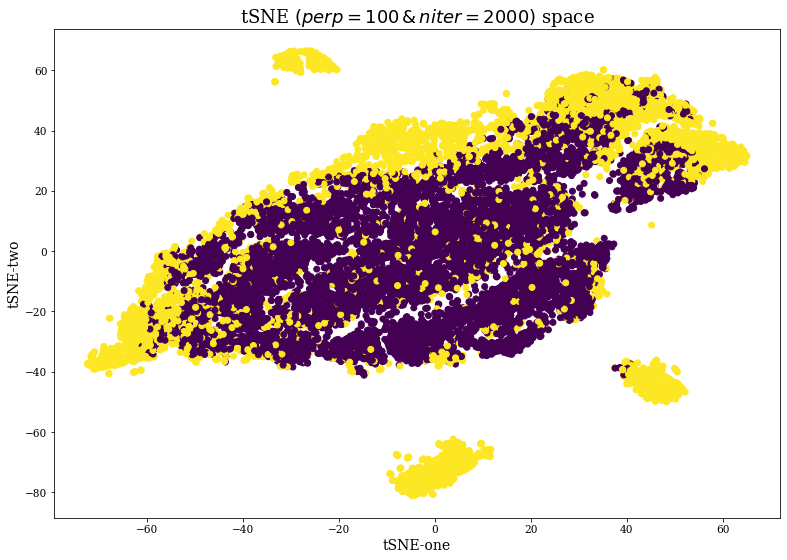

In [202]:
plt.scatter(df_SS_FV['tSNEone'], df_SS_FV['tSNEtwo'],c=df_SS_FV['IsoForestOutlier'])
plt.title("tSNE $(perp=%i \,&\, niter=%i)$ space" %(perp,niter))
plt.xlabel('tSNE-one')
plt.ylabel('tSNE-two')

In [201]:
#changing the number of outliers classified by ISF based on ther ISOForest Scores in Chami's dataset
df_SS_FV['IsoForestOutlier'] = df_ISF_chami.IsoForestScore < 0.08

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


(2, 6)

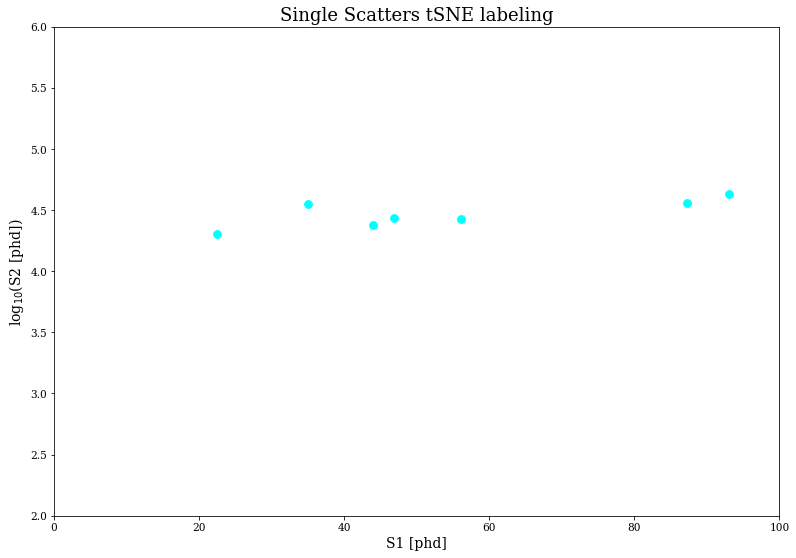

In [222]:
#selecting a population from df_MDC3_WS colorcoded in using cdict dictionary variable to plot
pop = 3

plt.scatter(df_MDC3_WS[df_SS_FV['tSNE_labels'] == pop].S1c, df_MDC3_WS[df_SS_FV['tSNE_labels'] == pop].logS2c, s = 60, c=cdict[pop])
plt.title("Single Scatters tSNE labeling") 
plt.xlabel('S1 [phd]') 
plt.ylabel(r'log$_{10}$(S2 [phd])')
plt.xlim(0, 100)
plt.ylim(2, 6)

In [146]:
df_MDC3_WS[(df_SS_FV['tSNE_labels'] == pop) & (df_SS_FV['S1c'] < 100)]

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


S1c    logS2c          rc2  driftTime  eventID  runID  \
11786  93.056587  4.632975   762.165756     539.11  3289174    198   
12568  56.057114  4.430551  2127.189540     455.88   387755    216   
13334  22.405434  4.303329  3058.962119     645.85   655195    233   
13594  35.027306  4.547691  4320.111173     472.17  3585317    238   
14010  87.239403  4.554858   905.412240     578.84  2357877    248   
14221  43.992748  4.380684  4707.796919     152.89   870473    254   
14386  46.850883  4.438269  2054.622807     297.04  3523711    257   

                                                    file  TBAsymmetry  \
11786  /global/projecta/projectdirs/lz/data/warehouse...    -0.665564   
12568  /global/projecta/projectdirs/lz/data/warehouse...    -0.471799   
13334  /global/projecta/projectdirs/lz/data/warehouse...    -0.798806   
13594  /global/projecta/projectdirs/lz/data/warehouse...    -0.572569   
14010  /global/projecta/projectdirs/lz/data/warehouse...    -0.528307   
14221  /global/projecta/projectdirs/lz/data/warehouse...     0.091014   
14386  /global/projecta/projectdirs/lz/data/warehouse...    -0.419211   

       peakFractionTop  peakFractionBottom  ...  s2AFT50  s2AFT75  s2AFT90  \
11786         0.137443            0.033061  ...      260      320      360   
12568         0.140247            0.091052  ...      310      370      410   
13334         0.640425            0.130133  ...      230      250      270   
13594         0.180757            0.103162  ...      140      180      210   
14010         0.111705            0.048078  ...      350      390      450   
14221         0.133908            0.119109  ...      190      220      260   
14386         0.107672            0.064760  ...      240      270      310   

       s2AFT95  s2AFT99    tSNEone    tSNEtwo  tSNE_labels        tag  isInWS  
11786      400      470  45.447926 -37.834236            3  651256452    True  
12568      450      500  46.029419 -41.795612            3   83755080    True  
13334      290      340  42.185715 -37.949860            3  152660435    True  
13594      250      300  39.843586 -29.747675            3  853305446    True  
14010      510      580  47.813316 -43.248055            3  584753496    True  
14221      290      350  41.577740 -32.339844            3  221100142    True  
14386      340      410  43.406822 -36.462433            3  905593727    True  

[7 rows x 39 columns]

In [32]:
df_cyan_Chami = pd.DataFrame(df_MDC3_WS[(df_SS_FV['tSNE_labels'] == pop) & (df_SS_FV['S1c'] < 100)], columns=['file', 'runID', 'eventID'])

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [33]:
df_cyan_Chami

file  runID  eventID
11786  /global/projecta/projectdirs/lz/data/warehouse...    198  3289174
12568  /global/projecta/projectdirs/lz/data/warehouse...    216   387755
13334  /global/projecta/projectdirs/lz/data/warehouse...    233   655195
13594  /global/projecta/projectdirs/lz/data/warehouse...    238  3585317
14010  /global/projecta/projectdirs/lz/data/warehouse...    248  2357877
14221  /global/projecta/projectdirs/lz/data/warehouse...    254   870473
14386  /global/projecta/projectdirs/lz/data/warehouse...    257  3523711

In [415]:
df_cyan_Chami.to_pickle("/global/homes/m/maris91/MDC3_AnomEventFinder/data/cyanPop_Chami.pkl") 

In [450]:
df_cyan_Chami.to_csv('/global/homes/m/maris91/MDC3_AnomEventFinder/data/cyan_events_WSROI.txt', header=None, index=None, sep=' ', mode='w')

In [147]:
S1size = 500
df_SS_FV['IsWS'] = df_SS_FV['tag'].isin(df_MDC3_WS['tag'])
plt.scatter(df_SS_FV[df_SS_FV['S1c'] < S1size].tSNEone, df_SS_FV[df_SS_FV['S1c'] < S1size].tSNEtwo, c=df_SS_FV[df_SS_FV['S1c'] < S1size].IsWS)
plt.title("tSNE (perp=%i & niter=%i) space, for S1 < %i " %(perp,niter,S1size))
plt.xlabel('tSNE-one')
plt.ylabel('tSNE-two')

Text(0, 0.5, 'tSNE-two')

In [148]:
S1size = 100
plt.scatter(df_SS_FV[df_SS_FV['S1c'] < S1size].tSNEone, df_SS_FV[df_SS_FV['S1c'] < S1size].tSNEtwo)
plt.title("tSNE (perp=%i & niter=%i) space, for S1 < %i " %(perp,niter,S1size))
plt.xlabel('tSNE-one')
plt.ylabel('tSNE-two')

Text(0, 0.5, 'tSNE-two')

In [173]:
from pulseViewer import plot_waveform

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


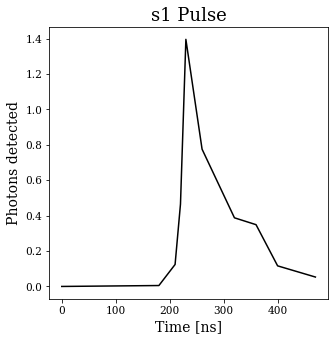

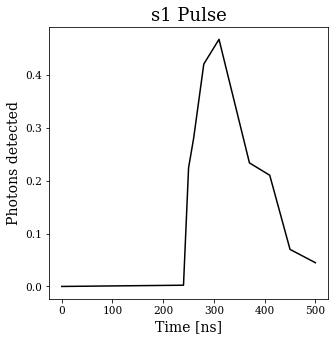

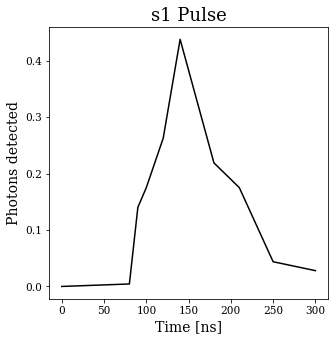

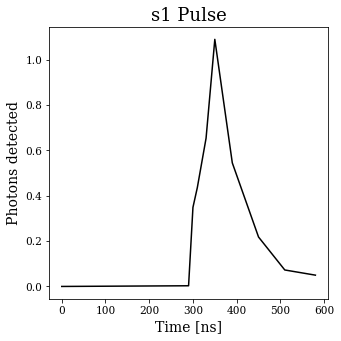

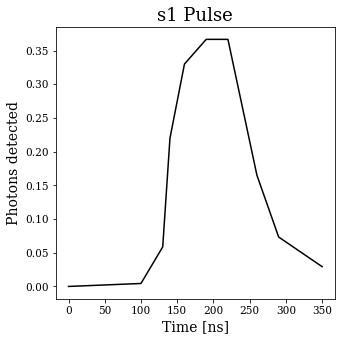

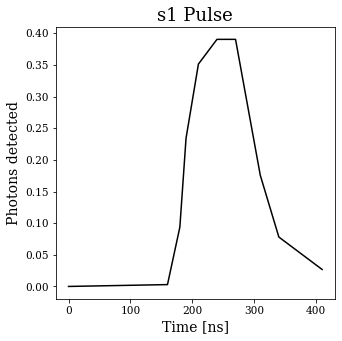

In [175]:
event = df_MDC3_WS[(df_SS_FV['tSNE_labels'] == pop) & (df_SS_FV['S1c'] < 100)]
event1 = event.iloc[0]
event2 = event.iloc[1]
event3 = event.iloc[2]
event4 = event.iloc[3]
event5 = event.iloc[4]
event6 = event.iloc[5]
event7 = event.iloc[6]
plot_waveform(event1, S1orS2 ='s1')
plot_waveform(event2, 's1')
plot_waveform(event3, 's1')
plot_waveform(event4, 's1')
plot_waveform(event5, 's1')
plot_waveform(event6, 's1')
plot_waveform(event7, 's1')

In [28]:
correlationVariablesDict = {0 : "peakFractionTop",
                         1 : "peakFractionBottom",
                         2 : "clusterSize",
                         3 : "promptFraction",
                         4 : "pulseBeforeS1Size",
                         5 : "pulseBeforeS2Size",
                         6 : "pulseAfterS1Size",
                         7 : "pulseAfterS2Size",
                         8 : "s1AFT1",
                         9 : "s1AFT5",
                         10 : "s1AFT10",
                         11 : "s1AFT25",
                         12 : "s1AFT50",
                         13 : "s1AFT75",
                         14 : "s1AFT90",
                         15 : "s1AFT95",
                         16 : "s1AFT99",
                         17 : "s2AFT1",
                         18 : "s2AFT5",
                         19 : "s2AFT10",
                         20 : "s2AFT25",
                         21 : "s2AFT50",
                         22 : "s2AFT75",
                         23 : "s2AFT90",
                         24 : "s2AFT95",
                         25 : "s2AFT99",
                         26 : "S1c",
                         27 : "logS2c",
                         28 : "rc2",
                         29 : "driftTime",
                         30 : "TBAsymmetry"}

feature_names = list(correlationVariablesDict.values())

Text(0.5, 1, 'Input Variable Correlations')

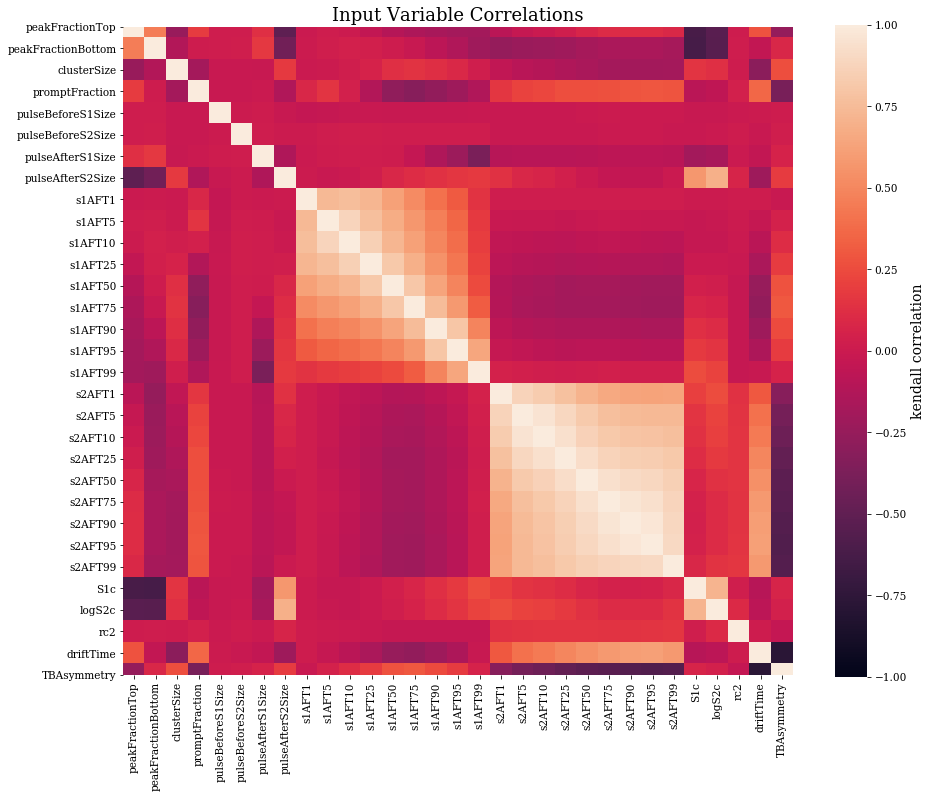

In [29]:
# Show correlation coefficients across variables
# Different correlation coefficients compared here: https://datascience.stackexchange.com/questions/64260/pearson-vs-spearman-vs-kendall
# Generically, Kendall only requires a monotonic relationship (not linear) and is more robust to outliers, as it only uses rank information (quantiles)
# Pearson includes a bit more information but assumes normal distributions and linear relationships
#method = 'pearson'
method = 'kendall'
#corr_vars = display_vars
corr_vars = feature_names
correlations = df_SS_FV[corr_vars].astype(np.float64).corr(method = method) # Kendall correlation coefficient ...
plt.figure(figsize = (15,12))
sns.heatmap(correlations, vmin = -1, annot = False, square = True, cbar_kws = {'label' : method+' correlation'})
plt.title('Input Variable Correlations')
